In [4]:
import librosa
import matplotlib.pyplot as plt

import librosa.display
import IPython.display as ipd
import numpy as np
import os
sampling_rate = 44100

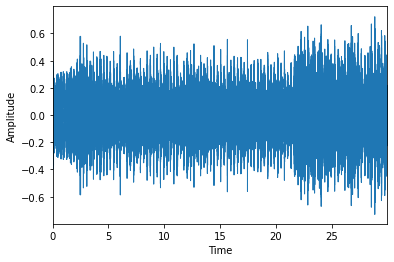

In [5]:
# pre-processing


def pre_process(file, duration):
    signal, sr = librosa.load(file, sr=sampling_rate)
    trimmed, index = librosa.effects.trim(signal) # trim away silent sections
    final_signal = trimmed[:(sampling_rate * duration)] # trim signal to duration in seconds
    return final_signal


signal = pre_process("everything_is_happening_so_Fast.wav", 30)

# display signal in the time domain

librosa.display.waveplot(signal, sr=sampling_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()







<function matplotlib.pyplot.show(close=None, block=None)>

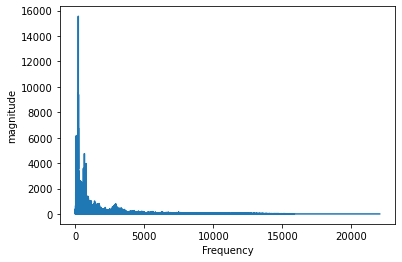

In [6]:
# plot the power spectrum (how much each frequency contributes to the signal)


fft = np.fft.fft(signal) # each element of the array is a compleex number encoding the amplitude and phase of each sample making up the wave form
magnitude = np.abs(fft) # magnitude indicates the contribution of each frequency to the overall sound

frequency = np.linspace(0, sampling_rate, len(magnitude)) # represents the frequency bins

left_magnitude = magnitude[:int(len(magnitude)/2)]
left_frequency = frequency[:int(len(frequency)/2)]

plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("magnitude")
plt.show

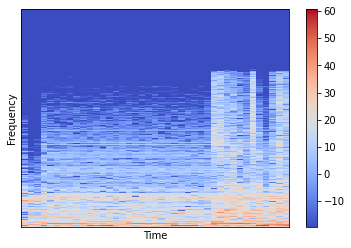

In [15]:
# stft spectrogram 

n_fft = 65536 #considering this number of samples when performing the fft
hop_length = int(65536/2)#amount we are shifting each transform to the right (overlap)
stft = librosa.core.stft(signal, hop_length=hop_length, n_fft = n_fft)
spectrogram = np.abs(stft) #find magnitude of complex numbers

log_spectrogram = librosa.amplitude_to_db(spectrogram) # convert frequency magnitudes to decibels 

librosa.display.specshow(log_spectrogram, sr=sampling_rate, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()



(13, 18365)


<function matplotlib.pyplot.show(close=None, block=None)>

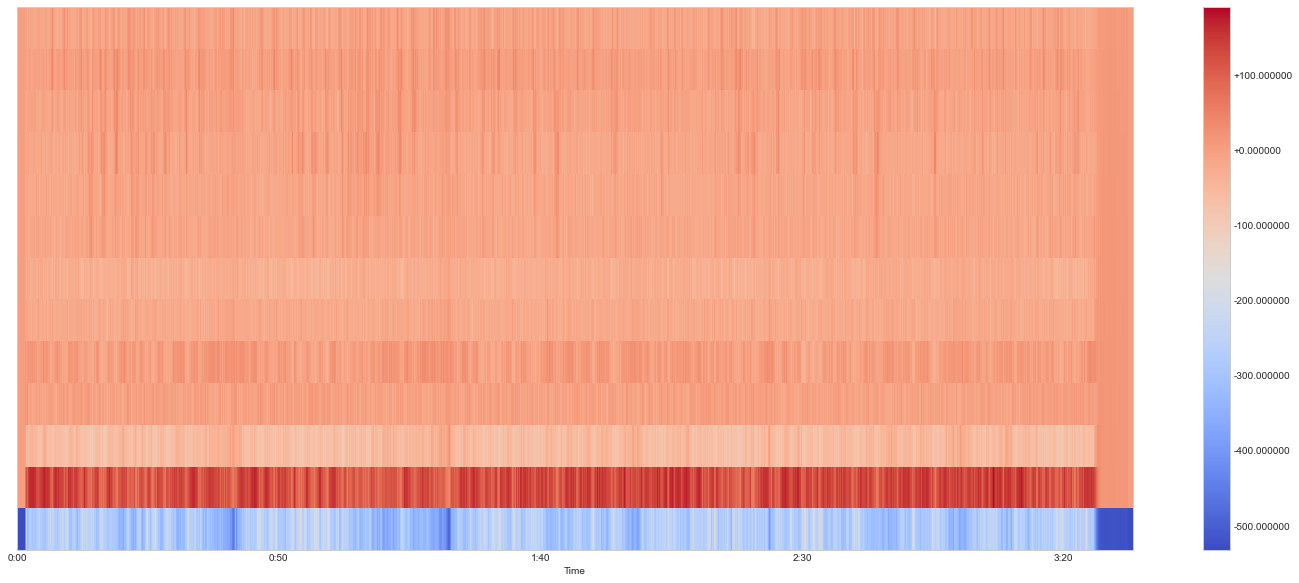

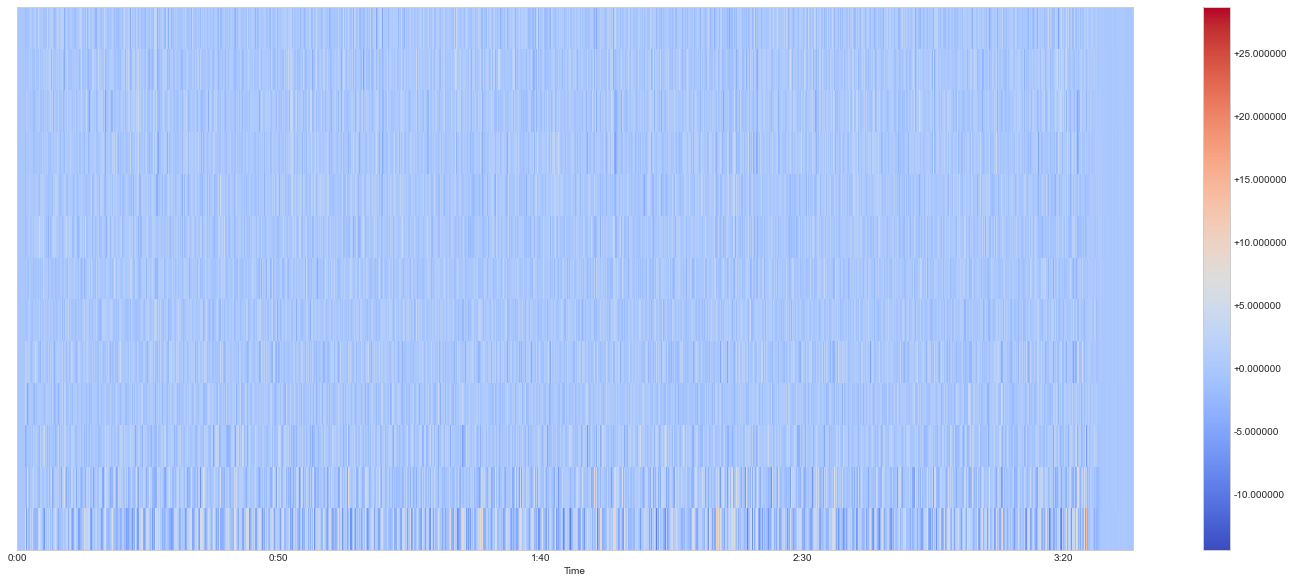

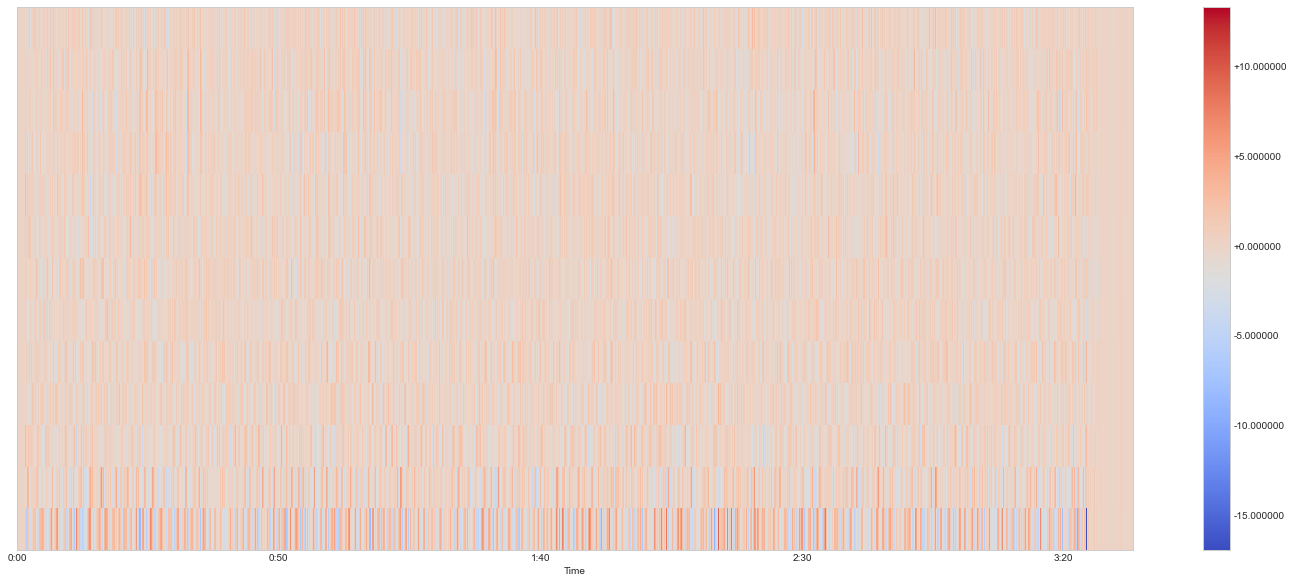

In [100]:
# feature extraction

#timbre
x, sr = librosa.load("timbre_test/violin.wav", sr=44100)


# mel-frequency cepstral coefficients
mfccs = librosa.feature.mfcc(x, n_mfcc=13, sr=sr)
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order=2)
print(delta_mfccs.shape)

plt.figure(figsize = (25,10))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2f")
plt.show

plt.figure(figsize = (25,10))
librosa.display.specshow(delta_mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2f")
plt.show

plt.figure(figsize = (25,10))
librosa.display.specshow(delta2_mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2f")
plt.show



In [7]:
comprehensive_mfccs = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))
comprehensive_mfccs.shape

(39, 18167)

In [72]:
# mfcc test
d = "timbre_test"
paths = [os.path.join(d, path) for path in os.listdir(d) if path.endswith('.wav')]
file = librosa.load(paths[1], sr=44100)[0]
clips = [get_samples(librosa.load(path, sr=44100)[0]) for path in paths]
print(clips[0])

# test 1: k means just using mfcc coefficients




#delta_mfccs = librosa.feature.delta(mfccs)
#delta2_mfccs = librosa.feature.delta(mfccs, order=2)



[array([], dtype=float32), array([ 0.00100708,  0.01664734,  0.02685547, ..., -0.0120697 ,
       -0.01185608, -0.01106262], dtype=float32), array([-0.00987244, -0.00849915, -0.0070343 , ..., -0.04507446,
       -0.04408264, -0.04240417], dtype=float32), array([-4.0267944e-02, -3.7887573e-02, -3.5293579e-02, ...,
       -9.1552734e-05, -1.7089844e-03, -2.8991699e-03], dtype=float32), array([-0.00363159, -0.00405884, -0.00447083, ...,  0.05827332,
        0.05160522,  0.04084778], dtype=float32), array([ 0.02810669,  0.03033447,  0.05491638, ..., -0.01596069,
       -0.02107239, -0.01631165], dtype=float32), array([-0.0161438 , -0.01831055, -0.0087738 , ...,  0.02363586,
        0.03100586,  0.03485107], dtype=float32), array([0.03457642, 0.02999878, 0.02128601, ..., 0.0045166 , 0.00602722,
       0.00752258], dtype=float32), array([0.00860596, 0.00938416, 0.00982666, ..., 0.12789917, 0.13067627,
       0.1295166 ], dtype=float32), array([0.12467957, 0.11653137, 0.10604858, ..., 0.12359

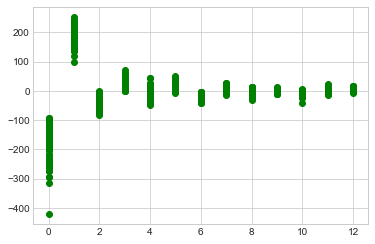

In [99]:
markers = ['red', 'orange', 'yellow', 'blue']


#for clip in range(len(clips)):
for sample in clips[3][1:]:
    if len(sample) > 0:
        mfccs = librosa.feature.mfcc(sample, n_mfcc=13, sr=sr)
        for mfcc in range(len(mfccs)):
            plt.plot(mfcc, np.average(mfccs[mfcc]), 'o', color='green')   
            
#for sample in clips[1][1:]:
 #   if len(sample) > 0:
  #      mfccs = librosa.feature.mfcc(sample, n_mfcc=13, sr=sr)
  #      for mfcc in range(len(mfccs)):
  #          plt.plot(mfcc, np.average(mfccs[mfcc]), 'o', color='blue')   
                





In [ ]:
# zero crossing rate

plt.figure(figsize = (14,5))
n0 = 18289
n1 = 19289

plt.plot(x[n0:n1])
plt.grid
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zcrs = librosa.feature.zero_crossing_rate(x + 0.0001)

plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])

In [18]:
# onset detection
def get_samples(audio):
    
    onset_indices = librosa.onset.onset_detect(audio, sr=sr, backtrack=True, units='samples', wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)

    onset_samples = [x[onset_indices[i]:onset_indices[i+1]] for i in range(len(onset_indices)-1)]
     
    return onset_samples


